# Exercise 1.1.2: Entropy of Real Data

In [1]:
from PIL import Image

import matplotlib.pyplot as plt
import numpy as np

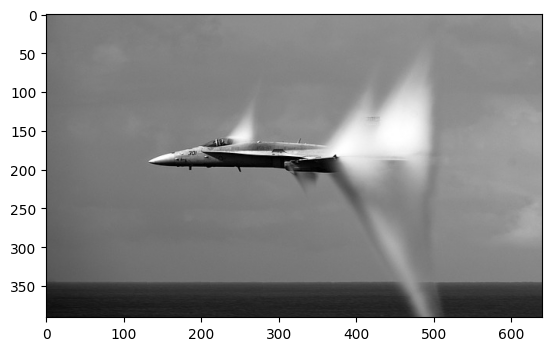

In [2]:
 
img = np.asarray(Image.open("../../../images/57e0d040495ba814f1dc8460962e33791c3ad6e04e50744074267bd69549c2_640.jpg").convert("L"))
imgplot = plt.imshow(img, cmap="gray")

In [3]:
print(repr(img))

array([[112, 112, 113, ..., 150, 149, 148],
       [112, 112, 112, ..., 150, 150, 150],
       [112, 112, 112, ..., 150, 150, 151],
       ...,
       [ 20,  22,  24, ...,  43,  43,  44],
       [ 19,  20,  21, ...,  40,  39,  38],
       [ 19,  19,  19, ...,  35,  33,  32]], shape=(391, 640), dtype=uint8)


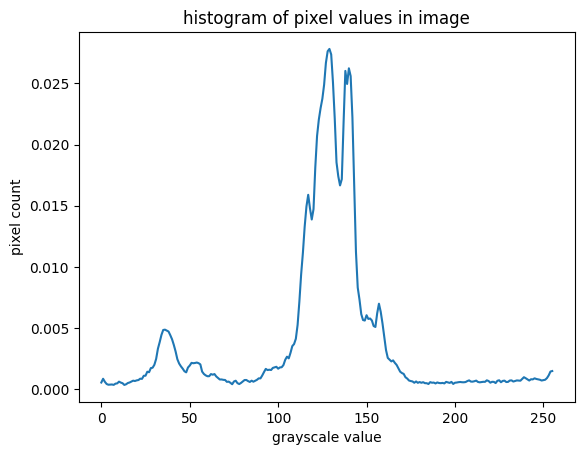

In [4]:
def createnormalisedhistogram(img):
    histogram, bin_edges = np.histogram(img, bins = 256, range = (0, 256))
    histogram = histogram / histogram.sum()
    fig, ax = plt.subplots()
    ax.set_title("histogram of pixel values in image")
    ax.set_xlabel("grayscale value")
    ax.set_ylabel("pixel count")
    ax.plot(bin_edges[0:-1], histogram)
    return histogram 

histogramimg1 = createnormalisedhistogram(img)

In [5]:
print(histogramimg1, len(histogramimg1))

[0.00054747 0.00085518 0.00060742 0.00042759 0.00036765 0.00037964
 0.00038763 0.00035566 0.00045556 0.00047954 0.00061941 0.00054348
 0.00049153 0.00035166 0.00040361 0.00050751 0.00055147 0.0006274
 0.00069933 0.00067136 0.00072331 0.00075128 0.00086317 0.00084719
 0.00109895 0.00110694 0.00143063 0.00139066 0.00172634 0.00175831
 0.00199808 0.00247762 0.00330882 0.00384831 0.00443974 0.00484335
 0.00487132 0.00479939 0.00471947 0.00441976 0.00408408 0.00362052
 0.00308903 0.00245364 0.00210198 0.0018742  0.00168638 0.00147059
 0.00137868 0.0017743  0.00193414 0.00215393 0.00212596 0.00214594
 0.00218191 0.00212996 0.00203005 0.00144262 0.0012468  0.00113491
 0.00106298 0.00106298 0.00123881 0.00118686 0.00123881 0.001043
 0.00091912 0.00079524 0.00079923 0.00076726 0.00075527 0.00060342
 0.0006234  0.00052749 0.00040761 0.00063139 0.00069533 0.00049552
 0.00042359 0.00051551 0.00063139 0.00075128 0.00075527 0.00066336
 0.00059543 0.00069933 0.00061541 0.00068734 0.00076726 0.0008871

In [ ]:
def entropy(array):
    array = array[array > 0]
    array = (lambda x : x * np.log2(x))(array)
    entropy = -sum(array)
    return entropy


In [7]:
print(entropy(histogramimg1))

6.709118506707491


Theoretical maximum entropy for an 8 bit image occurs when there is a uniform distribution of pixels, i.e p = 1/256. This yields an entropy of 8 bits.

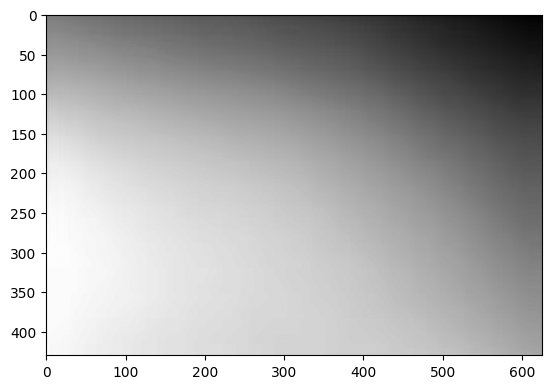

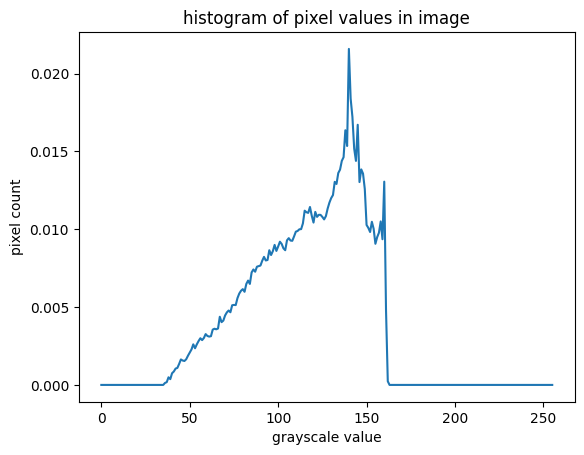

In [8]:
img2 = np.asarray(Image.open("../../../images/blue-gradient-color-background-image_675380-1007.avif").convert("L"))
plt.imshow(img2, cmap="gray")
histogram2 = createnormalisedhistogram(img2)

In [10]:
print(entropy(histogram2))

6.719704970827648


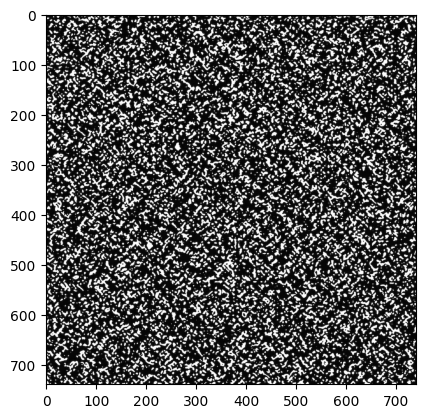

In [12]:
randomnoise = np.asarray(Image.open("../../../images\hand-drawn-composition-notebook-pattern_23-2149286085.avif").convert("L"))
plt.imshow(randomnoise, cmap="gray")

6.2079486628978335


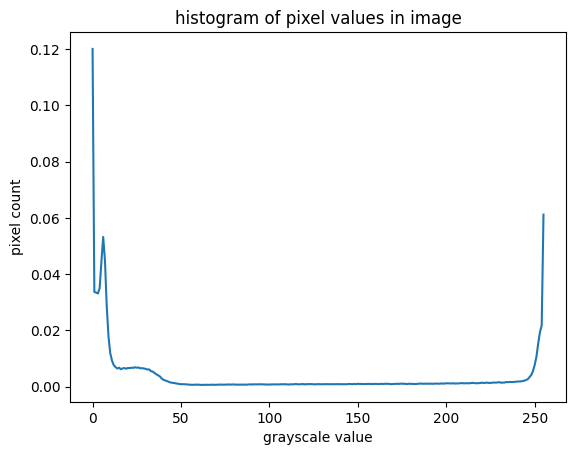

In [13]:
noisyhistogram = createnormalisedhistogram(randomnoise)
print(entropy(noisyhistogram))

This image is not true random noise, which would have a very different entropy. lets see below what that would look like.

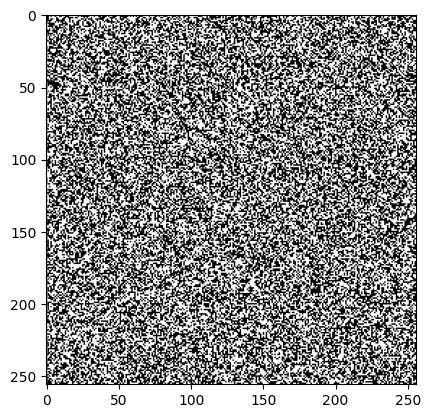

In [14]:
BandWnoise = np.random.choice([0,255], size=(256,256)).astype(np.uint8)
plt.imshow(BandWnoise, cmap="gray")

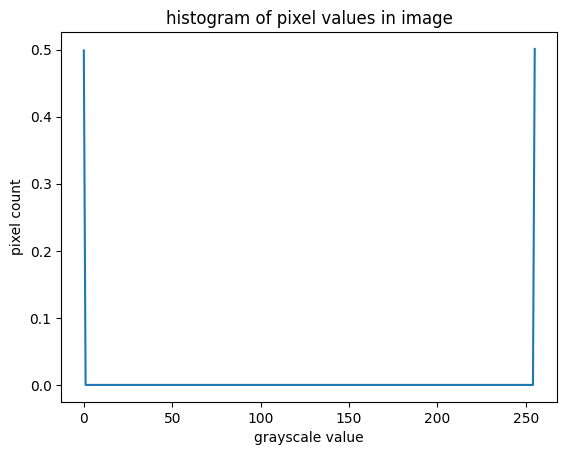

In [15]:
truenoisehist = createnormalisedhistogram(BandWnoise)

In [16]:
print(entropy(truenoisehist))

0.9999962210810323


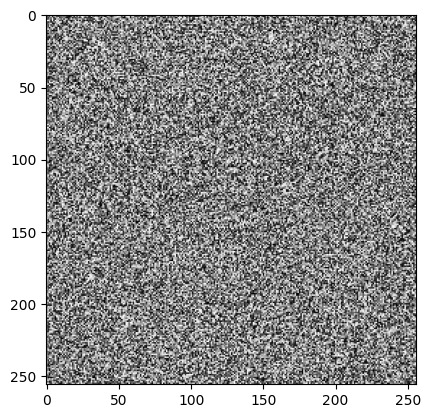

In [17]:
full_noise = np.random.randint(0, 256, size=(256, 256)).astype(np.uint8)
plt.imshow(full_noise, cmap="gray")

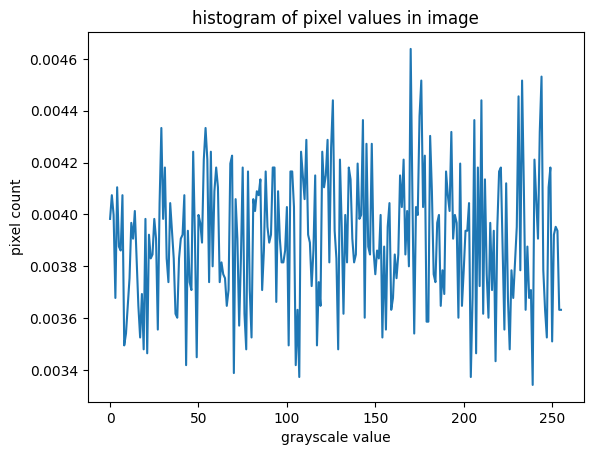

In [18]:
fullhist = createnormalisedhistogram(full_noise)

In [19]:
print(entropy(fullhist))

7.996891804112119
